Let's generate some data first sampled from the Clayton copula

In [1]:
from scipy.stats import multivariate_normal, norm, poisson, gamma
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%load_ext autoreload
%autoreload 2
from CopulaGenerator import CopulaGenerator 
import itertools

In [2]:
cop = CopulaGenerator()

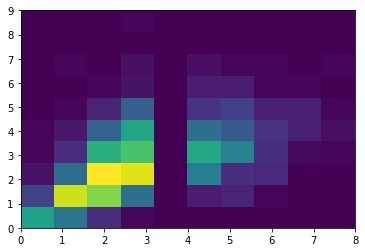

In [3]:
cp = cop.MultiDimensionalClayton(1.5, d=(2,1000))
lambdas = np.random.uniform(0.5, 6, size=2)
data_clayton = cop.generate_data(cp, lambdas)
fig, ax = plt.subplots(1, 1)
ax.hist2d(data_clayton[0], data_clayton[1], bins=10, density=True, cmin=0, cmax=10)
plt.show()
#ax.hist(data_clayton, density=True, histtype='stepfilled', alpha=0.2)


Now we compute the CDF of the multidimensional data.

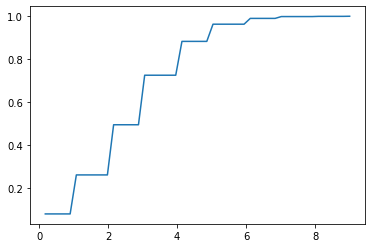

In [8]:
num_bins = 50
counts, bin_edges = np.histogram(data_clayton, bins=num_bins)
cdf = np.cumsum(counts) # formula
plt.plot(bin_edges[1:], cdf/cdf[-1])

In [9]:
poisson_cdf = poisson.cdf(data_clayton[0], 4.1)
poisson_cdf[:40]

array([0.22381398, 0.76931223, 0.76931223, 0.41418154, 0.60930829,
       0.08452064, 0.60930829, 0.01657268, 0.76931223, 0.08452064,
       0.08452064, 0.41418154, 0.76931223, 0.87864825, 0.22381398,
       0.22381398, 0.08452064, 0.41418154, 0.41418154, 0.41418154,
       0.41418154, 0.41418154, 0.60930829, 0.22381398, 0.60930829,
       0.08452064, 0.08452064, 0.60930829, 0.41418154, 0.76931223,
       0.08452064, 0.22381398, 0.08452064, 0.08452064, 0.08452064,
       0.08452064, 0.41418154, 0.41418154, 0.08452064, 0.08452064])

In [10]:
x = poisson.rvs(lambdas[0], size=1000)
poisson_cdf = poisson.cdf(x, lambdas[0])
poisson_cdf[:20]

array([0.8432442 , 0.98055376, 0.94027554, 0.38594895, 0.12549038,
       0.38594895, 0.38594895, 0.8432442 , 0.65624324, 0.65624324,
       0.8432442 , 0.8432442 , 0.12549038, 0.65624324, 0.65624324,
       0.8432442 , 0.8432442 , 0.8432442 , 0.94027554, 0.65624324])

In [94]:
def pmf(x, mu):
    dim = len(x)
    m = list(itertools.combinations_with_replacement([0,1], dim))
    sum_m = np.array([sum(i) for i in m])
    sum_k = np.zeros(dim)
    #print("heyhey")
    for k in range(dim):
       # print("hey")
        indices = np.array(np.where(sum_m == k))
        print("indices: " + str(indices))
        #print("sum_m: " + str(sum_m))
        correct_ms = np.take(m, indices.flatten(), axis=0)
        print("correct_ms: " + str(correct_ms))
        sum_fx = np.zeros(dim)
        for correct_m in correct_ms:
            sum_fx = np.add(sum_fx, poisson.cdf(np.subtract(x, correct_m), 2.2)) # sum elements from the element-wise
        # substraction between the original x input array and the values mi such that m sums up to k 
            #print("sum_fx: " + str(sum_fx))
        print("sum_k: " + str(sum_k))
        sum_k = np.add(sum_k, ((-1)**k * sum_fx))
    return sum_k
    

In [85]:
dim = 4
k = 2
m = list(itertools.combinations_with_replacement([0,1], dim))
print(m)
sum_m = np.array([sum(i) for i in m])
print(sum_m)
indices = np.array(np.where(sum_m == k))
print(indices.flatten())
correct_ms = np.take(m, indices.flatten(), axis=0)
print(correct_ms)
x = np.array([1, 2, 3, 4])
for correct_m in correct_ms:
    print("Correct_m: " + str(correct_m.flatten()))
    m_ = correct_m.flatten()
    print(poisson.cdf(np.subtract(x, m_), 2.2))



[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 1), (0, 1, 1, 1), (1, 1, 1, 1)]
[0 1 2 3 4]
[2]
[[0 0 1 1]]
Correct_m: [0 0 1 1]
[0.35457011 0.62271375 0.62271375 0.81935242]


In [93]:
(-1)**0

1

In [86]:
a = np.array([0.35457011, 0.62271375, 0.62271375, 0.81935242])
b = np.array([0.35457011, 0.62271375, 0.62271375, 0.81935242])
np.add(a, b)

array([0.70914022, 1.2454275 , 1.2454275 , 1.63870484])

In [11]:
multipoiss = MultivariatePoisson()
x, mu = multipoiss.rvs("clayton", size=1)

In [95]:
x = np.array([1, 2, 3, 4])
mu = np.array([[2.2]])
pmf(x, mu)

indices: [[0]]
correct_ms: [[0 0 0 0]]
sum_k: [0. 0. 0. 0.]
indices: [[1]]
correct_ms: [[0 0 0 1]]
sum_k: [0.35457011 0.62271375 0.81935242 0.92750369]
indices: [[2]]
correct_ms: [[0 0 1 1]]
sum_k: [0.         0.         0.         0.10815127]
indices: [[3]]
correct_ms: [[0 1 1 1]]
sum_k: [0.35457011 0.62271375 0.62271375 0.92750369]


array([0.        , 0.26814364, 0.        , 0.10815127])

In [51]:
b = np.array([sum(i) for i in a])
np.where(b == 2)

(array([2]),)

In [54]:
c = np.random.randint(0,10, size=10)

In [55]:
c

array([6, 4, 6, 6, 5, 3, 6, 0, 9, 9])

In [59]:
d = np.random.randint(0, 5, size=10)

In [73]:
pmf(c)

[ 0  1  2  3  4  5  6  7  8  9 10]
[[5]]


ValueError: invalid number of arguments

In [5]:
from MultivariatePoisson import MultivariatePoisson 

In [2]:
mv = MultivariatePoisson()

In [3]:
data = mv.rvs("gaussian")
data.shape

number 0


(1, 2000)